## **Proyecto**: "Credit Card Fraud Detection" *Anonymized credit card transactions labeled as fraudulent or genuine*

- **Autor:** Jorge Faieta
- **Dataset: [Kaggle]("https://www.kaggle.com/mlg-ulb/creditcardfraud")**

**`Información del conjunto de datos`**
Este conjunto de datos contiene transacciones realizadas con tarjetas de crédito en **septiembre de 2013** por titulares de tarjetas europeos.

Es importante destacar que el dataset presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, **la clase positiva (fraudes) representa el 0,172% de todas las transacciones.**

Como podemos observar las variable de entrada son númerica y son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos obtener las características originales y más información de fondo sobre los datos. 

Las características V1, V2,… V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son **`'Tiempo'`** y **`'Cantidad'`**. 

La característica **`'Tiempo'`** contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. 

La función **`'Importe'`** es el Importe de la transacción. 

La característica **`'Clase'`** es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

### Importamos la librerías con las que trabajaremos

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### Procedemos a cargar el dataset

In [3]:
data = pd.read_csv("./Data/creditcard.csv")

### Visualizaremos si el dataset se cargó de manera y observamos las primeras 5 filas

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print("Variables que conforman el dataset:\n {}".format(data.columns))
print("El dataset está conformado por: {} filas y {} columnas".format(data.shape[0],data.shape[1]))

Variables que conforman el dataset:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
El dataset está conformado por: 284807 filas y 31 columnas


### Observamos el detalle de los datos contenidos

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Uno de los aspectos que podemos observar:

 - Time: se confirma que la data está compuesta por 284.807 transacciones que ocurrieron en dos días: 172.792 segundos (172.792 segundos / 86400 = 2 días)


### Revisamos el tipo de datos de cada variable

In [14]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Procederemos a comprobar si existe datos faltantes o nulos

In [17]:
data.isnull().sum()
# Estamos en presencia de un dataset sin valores faltantes o nulos

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Observaremos como se encuentra distribuida la variable **`Class`**

In [18]:
data["Class"].value_counts()
# Tanto en esta línea de código como en la siguiente podemos observar:
# El 99.82% de las observaciones 284.315 Son normales, No existe sospecha de Fraude
# El 0.172% de las observaciones 492 son transacciones Fraudulentas

0    284315
1       492
Name: Class, dtype: int64

In [29]:
data["Class"].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Text(0.5, 1.0, 'Ocurrencias de Transacciones Normales: 0 | Fraudulentas: 1')

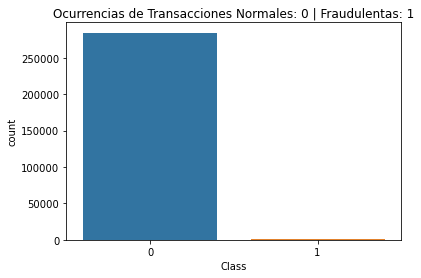

In [27]:
# Visualizamos las ocurrencias por clase
sns.countplot(x='Class',data=data).set_title('Ocurrencias de Transacciones Normales: 0 | Fraudulentas: 1')

`Tras haber revisado la variable 'Class' podemos evidenciar que la data se encuentra altamente desbalanceada o desequilibrada`

### Visualizaremos la distribución de las transacciones Fraudulentas y No Fraudulentas en el tiempo

In [33]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

# Compruebo que no se me quede ningún dato por fuera revisando la estructura
print(class_0.shape)
print(class_1.shape)

(284315,)
(492,)


In [38]:
#!pip install plotly

In [52]:
hist_ = [class_0, class_1]
# Anadimos las etiquetas
etiquetas = ['No Fraudulentas', 'Fraudulentas']

# Eliminamos el histograma para poder observar claramente la linea de distribución
fig = ff.create_distplot(hist_, etiquetas, show_hist=False, show_rug=False)
fig['layout'].update(title='Distribución Tiempos Operaciones Tarjetas de crédito', xaxis=dict(title='Tiempo [s]'))
iplot(fig, filename='dist_only')

`Observando el gráfico podríamos comentar que las operaciones fraudulentas se comportan o distribuyen de una manera más uniforme`

### Visualización de Cantidades o Montos de transacción por tipo de operación 

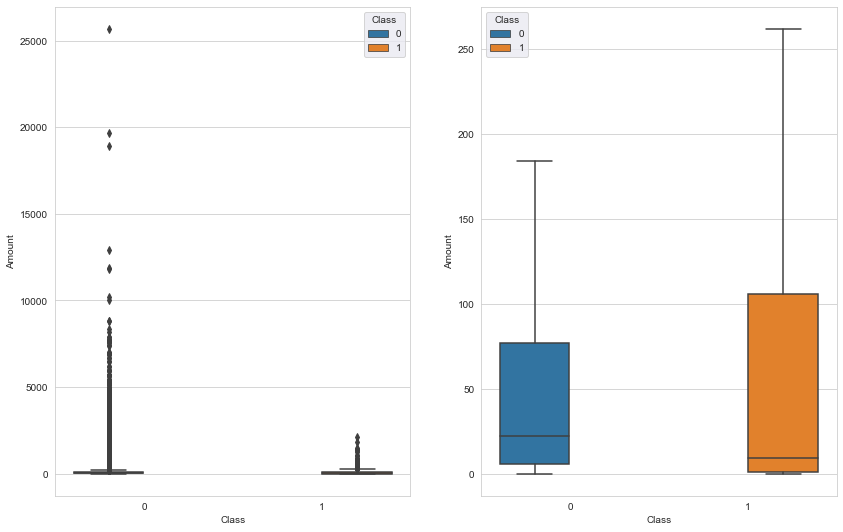

In [60]:
fig,(ax1,ax2) =plt.subplots(ncols=2,figsize=(14,9))
sns.set_style('darkgrid')
s = sns.boxplot(ax = ax1, x='Class',y='Amount',data=data, hue='Class')
s = sns.boxplot(ax = ax2, x='Class',y='Amount',data=data, hue='Class', showfliers=False)
plt.show()